## Solo si quieren correr el modelo phi-4

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from transformers import pipeline,AutoTokenizer, AutoModelForCausalLM

In [ ]:
import torch

In [ ]:
model_id = "microsoft/Phi-4-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForCausalLM.from_pretrained(model_id,device_map="balanced_low_0",
#     torch_dtype="auto",
#     trust_remote_code=True,)
# pipe = pipeline(
#     "text-generation",
#     model=model,
#     tokenizer=tokenizer,
# )
pipe = pipeline(
    "text-generation",
    model=model_id,
    device_map="sequential",  # o usa "sequential"
    torch_dtype="auto",
    trust_remote_code=True,
)
generation_args = {
    "max_new_tokens": 600,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Device set to use cuda:0


## Esta linea es para guardar los resultados en el drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Esta linea es para obtener el dataset conversacional

In [1]:
!curl -L -o "Movies.zip" "https://drive.google.com/uc?export=download&id=1XdtoxTeBOemkLO3hiAVRTxxUoMKr_h1S"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 5572k  100 5572k    0     0   372k      0  0:00:14  0:00:14 --:--:-- 1589k


## Esta linea es para obtener los generos de las peliculas

In [2]:
!curl -L -o "movies_genres.zip" "https://drive.google.com/uc?export=download&id=1Ek6tXMIQ8dYRR09zl-yme3UocarwhTMu"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1458k  100 1458k    0     0   519k      0  0:00:02  0:00:02 --:--:--  992k


## De aca se puede obtener las recomendaciones hechas por el modelo a los primeros 100 usuarios

In [3]:
!curl -L -o "llm_recommend_phi-4.json" "https://drive.google.com/uc?export=download&id=1UzoF9m4TPt34gu92R1VK0X8-KwH4MZQe"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  196k  100  196k    0     0   134k      0  0:00:01  0:00:01 --:--:-- 1908k


In [4]:
!unzip movies_genres.zip

Archive:  movies_genres.zip
  inflating: movies_genres.csv       


In [5]:
!unzip Movies.zip

Archive:  Movies.zip
  inflating: Movie/.DS_Store         
  inflating: Movie/Conversation.txt  
  inflating: Movie/final_data.jsonl  
  inflating: Movie/item_map.json     
  inflating: Movie/user_ids.json     


In [6]:
import json
import csv
from tqdm import tqdm
import pandas as pd
import re

In [7]:
genres_df = genres_df = pd.read_csv("movies_genres.csv")

In [8]:
genres_df["title"] = genres_df["title"].str.replace(r"\s*\(\d{4}\)", "", regex=True)

In [9]:
genres_df["title"] = genres_df["title"].str.lower()

In [10]:
genres_df["n_generos"] = genres_df["genres"].str.split("|").apply(len)

In [11]:
len(genres_df)

87585

## Funciones para poder leer el dataset

In [12]:
import json
import csv
import re
import copy
def read_json(path):
    with open(path, 'r') as file:
        df = json.load(file)
    return df


def read_txt(txt_path):
    with open(txt_path, 'r') as file:
        text = file.read()
    return text


def read_dialogue(txt_path):
    with open(txt_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content


def split_dialogues(text):
    dialogues = []
    current_number = None
    current_dialogue = ''

    lines = text.split('\n')

    for line in lines:
        if line.isdigit():
            if current_number is not None:
                dialogues.append((current_number, current_dialogue.strip()))
                current_dialogue = ''
            current_number = line
        else:
            current_dialogue += line + '\n'

    if current_number is not None and current_dialogue.strip():
        dialogues.append((current_number, current_dialogue.strip()))

    return dialogues


def get_conversation_by_id(content, conversation_id):

    lines = content.strip().split('\n\n')
    current_id = None
    conversation = []

    for line in lines:
        if line.isdigit():

            if current_id is not None and conversation:
                if current_id == conversation_id:
                    return ''.join(conversation)
                conversation = []
            current_id = int(line)
        else:
            conversation.append(line + '\n\n')


    if current_id == conversation_id:
        return ''.join(conversation)

    return 'Can not find the Conversation:{}'.format(conversation_id)


def read_jsonl(path):
    with open(path, "r") as fr:
        output_lines = fr.readlines()
    return output_lines


def read_string_by_line(line_number, path):
    with open(path, 'r') as file:
        lines = file.readlines()
        if line_number < len(lines):
            return lines[line_number].strip()
        else:
            return None


def read_csv(path):
    result = []
    with open(path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            result.append(row[0])
    return result


def read_user_data(filename, user_id):
    with open(filename, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]

    for entry in data:
        if user_id in entry:
            return entry[user_id]

    return None

def item_id_to_item_name(item_id, item_id_dict):
  if item_id_dict[item_id] is not None:
    return item_id_dict[item_id]
  return ""

def get_movies(recommend_movies):
  pattern = r'"(.*?)"'
  movie_titles = re.findall(pattern, recommend_movies)
  return movie_titles


## Obtención de datos para cada usuario

In [13]:


path = './Movie'
final_data_path = '{}/final_data.jsonl'.format(path)
Conversation_path = '{}/Conversation.txt'.format(path)
user_map_path = '{}/user_ids.json'.format(path)
item_map_path = '{}/item_map.json'.format(path)


'''Part 1:If you want to go through the whole data'''

final_data = read_jsonl(final_data_path)
user_map = read_json(user_map_path)
item_map = read_json(item_map_path)
Conversation = read_dialogue(Conversation_path)
Total_len = len(final_data)
val_user_recommendations = dict()
user_likes= dict()
user_dislikes = dict()
user_history = dict()
movie_popularity = dict()
for i in tqdm(range(Total_len), desc='Processing'):
        Per_data = json.loads(final_data[i])
        user_id, user_information = next(iter(Per_data.items()))
        # read user's history_interaction
        history_interaction = user_information['history_interaction']
        for m in range(len(history_interaction)):
          name = item_map[history_interaction[m]].lower()
          if name not in movie_popularity:
            movie_popularity[name] = 1/3131
          else:
            movie_popularity[name] += 1/3131
          history_interaction[m] = name
        if user_id not in user_history:
          user_history[user_id] = history_interaction
        # read user_might_likes
        user_might_likes = user_information['user_might_like']
        for m in range(len(user_might_likes)):
          name = item_map[user_might_likes[m]].lower()
          user_might_likes[m] = name

        if user_id not in val_user_recommendations:
          val_user_recommendations[user_id] = user_might_likes
        # read Conversation_info
        Conversation_info = user_information['Conversation']
        # read Conversation Detail Information
        for j in range(len(Conversation_info)):
            per_conversation_info = Conversation_info[j]['conversation_{}'.format(j+1)]
            user_likes_id = per_conversation_info['user_likes']
            user_dislikes_id = per_conversation_info['user_dislikes']
            user_likes_names = []
            user_dislikes_names = []
            for m in range(len(user_likes_id)):
              name = item_map[user_likes_id[m]].lower()
              user_likes_names.append(name)
            for m in range(len(user_dislikes_id)):
              name = item_map[user_dislikes_id[m]].lower()
              user_dislikes_names.append(name)
            if user_id not in user_likes:
              user_likes[user_id] = user_likes_names
              user_dislikes[user_id] = user_dislikes_names
print(len(val_user_recommendations), len(user_likes),len(user_dislikes), len(user_history), len(movie_popularity))
median_pop = 0
for movie in movie_popularity:
  median_pop += movie_popularity[movie]
print(median_pop/9512)
with open("val_recommendation.json", "w") as f:
  json.dump(val_user_recommendations, f, indent=4)
with open("user_likes.json", "w") as f:
  json.dump(user_likes, f, indent=4)
with open("user_dislikes.json", "w") as f:
  json.dump(user_dislikes, f, indent=4)
with open("user_history.json", "w") as f:
  json.dump(user_history, f, indent=4)
with open("movie_pop.json", "w") as f:
  json.dump(movie_popularity, f, indent=4)

Processing: 100%|██████████| 3131/3131 [00:01<00:00, 2795.98it/s]


3131 3131 3131 3131 9512
0.004987832948627484


## Tipos de mensajes que se le van a pasar al modelo

In [14]:
all_messages = {
    "zero_shot": {
        "no_one": [
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": "Hi, give me 20 movie recommendations that I haven't seen."}
        ],
        "likes_dislikes":[
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": "Hi. I liked the following movies: {liked}. I didn't like the following movies: {disliked}. Give me 20 movie recommendations that I haven't seen."},
        ],
        "likes":[
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": "Hi. I liked the following movies: {liked}. Give me 20 movie recommendations that I haven't seen."}
        ],
        "dislikes":[
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": "Hi, I didn't like the following movies: {disliked}. Give me 20 movie recommendations that I haven't seen."}
        ]
    },
    "few_shot":{
        "no_one": [
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant as an example, and a last sentece that is the real conversation. Based on the last sentence, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": """ Hi, what kind of movie can I suggest to you?"""},
            {"role": "assistant", "content": """ What kind of movies do you like? I'm good, thanks for asking! Have a great day!"""},
            {"role": "user", "content": """ I am looking for a slap stick comedy from the 80’s or 90’s."""},
            {"role": "assistant", "content": """ What kind of movies do you like? I’m good, thanks for asking! Have a great day! """},
            {"role": "user", "content": """Do you have any animated recommendations that are a bit more dramatic? Like A Scanner Darkly for example."""},
            {"role": "assistant", "content": """ Have you seen Final Fantasy: The Spirits Within? It’s animated sci-fi with depth and drama!"""},
            {"role": "user", "content": "Hi, give me 20 movie recommendations that I haven't seen."}
        ],
        "likes_dislikes":[
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant as an example, and a last sentece that is the real conversation. Based on the last sentence, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": """ Hi, what kind of movie can I suggest to you?"""},
            {"role": "assistant", "content": """ What kind of movies do you like? I'm good, thanks for asking! Have a great day!"""},
            {"role": "user", "content": """ I am looking for a slap stick comedy from the 80’s or 90’s."""},
            {"role": "assistant", "content": """ What kind of movies do you like? I’m good, thanks for asking! Have a great day! """},
            {"role": "user", "content": """Do you have any animated recommendations that are a bit more dramatic? Like A Scanner Darkly for example."""},
            {"role": "assistant", "content": """ Have you seen Final Fantasy: The Spirits Within? It’s animated sci-fi with depth and drama!"""},
            {"role": "user", "content": "Hi. I liked the following movies: {liked}. I didn't like the following movies: {disliked}. Give me 20 movie recommendations that I haven't seen."},
        ],
        "likes":[
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant as an example, and a last sentece that is the real conversation. Based on the last sentence, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": """ Hi, what kind of movie can I suggest to you?"""},
            {"role": "assistant", "content": """ What kind of movies do you like? I'm good, thanks for asking! Have a great day!"""},
            {"role": "user", "content": """ I am looking for a slap stick comedy from the 80’s or 90’s."""},
            {"role": "assistant", "content": """ What kind of movies do you like? I’m good, thanks for asking! Have a great day! """},
            {"role": "user", "content": """Do you have any animated recommendations that are a bit more dramatic? Like A Scanner Darkly for example."""},
            {"role": "assistant", "content": """ Have you seen Final Fantasy: The Spirits Within? It’s animated sci-fi with depth and drama!"""},
            {"role": "user", "content": "Hi. I liked the following movies: {liked}. Give me 20 movie recommendations that I haven't seen."}
        ],
        "dislikes":[
            {"role": "system", "content": "You are a helpful movie recommender system. I will give you a conversation between a human and assistant as an example, and a last sentece that is the real conversation. Based on the last sentence, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}."},
            {"role": "user", "content": """ Hi, what kind of movie can I suggest to you?"""},
            {"role": "assistant", "content": """ What kind of movies do you like? I'm good, thanks for asking! Have a great day!"""},
            {"role": "user", "content": """ I am looking for a slap stick comedy from the 80’s or 90’s."""},
            {"role": "assistant", "content": """ What kind of movies do you like? I’m good, thanks for asking! Have a great day! """},
            {"role": "user", "content": """Do you have any animated recommendations that are a bit more dramatic? Like A Scanner Darkly for example."""},
            {"role": "assistant", "content": """ Have you seen Final Fantasy: The Spirits Within? It’s animated sci-fi with depth and drama!"""},
            {"role": "user", "content": "Hi, I didn't like the following movies: {disliked}. Give me 20 movie recommendations that I haven't seen."}
        ]
    },
    "cot":{
        "no_one": [
            {"role": "system", "content": """You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}. Follow this step-by-step reasoning before providing your list of recommendations: Identify the key genres and themes in the user's preferences. Search your knowledge base for movies that match those criteria. Select the 20 most relevant ones and rank them from most to least recommended."""},
            {"role": "user", "content": "Hi, give me 20 movie recommendations that I haven't seen."}
        ],
        "likes_dislikes":[
            {"role": "system", "content": """You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}. Follow this step-by-step reasoning before providing your list of recommendations: Identify the key genres and themes in the user's preferences. Search your knowledge base for movies that match those criteria. Select the 20 most relevant ones and rank them from most to least recommended."""},
            {"role": "user", "content": "Hi. I liked the following movies: {liked}. I didn't like the following movies: {disliked}. Give me 20 movie recommendations that I haven't seen."},
        ],
        "likes":[
            {"role": "system", "content": """You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}. Follow this step-by-step reasoning before providing your list of recommendations: Identify the key genres and themes in the user's preferences. Search your knowledge base for movies that match those criteria. Select the 20 most relevant ones and rank them from most to least recommended."""},
            {"role": "user", "content": "Hi. I liked the following movies: {liked}. Give me 20 movie recommendations that I haven't seen."}
        ],
        "dislikes":[
            {"role": "system", "content": """You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}. Follow this step-by-step reasoning before providing your list of recommendations: Identify the key genres and themes in the user's preferences. Search your knowledge base for movies that match those criteria. Select the 20 most relevant ones and rank them from most to least recommended."""},
            {"role": "user", "content": "Hi, I didn't like the following movies: {disliked}. Give me 20 movie recommendations that I haven't seen."}
        ]
    }
}

In [ ]:
messages_pr = all_messages["few_shot"]["likes_dislikes"]
print(messages_pr)

[{'role': 'system', 'content': 'You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 20 recommendations without extra sentences, only the names. You also have the historical views of this user, that contains: {hist}.'}, {'role': 'user', 'content': ' Hi, what kind of movie can I suggest to you?'}, {'role': 'assistant', 'content': " What kind of movies do you like? I'm good, thanks for asking! Have a great day!"}, {'role': 'user', 'content': ' I am looking for a slap stick comedy from the 80’s or 90’s.'}, {'role': 'assistant', 'content': ' What kind of movies do you like? I’m good, thanks for asking! Have a great day! '}, {'role': 'user', 'content': 'Do you have any animated recommendations that are a bit more dramatic? Like A Scanner Darkly for example.'}, {'role': 'assistant', 'content': ' Have you seen Final Fantasy: The Spirits Within? It’s animated sci-fi with depth and drama!'}, {'role

## Obtener recomendaciones del modelo

In [ ]:
path = '.'
user_likes_path = '{}/user_likes.json'.format(path)
user_dislikes_path = '{}/user_dislikes.json'.format(path)
user_history_path = '{}/user_history.json'.format(path)
val_recommendation_path = '{}/val_recommendation.json'.format(path)

user_likes = read_json(user_likes_path)
user_dislikes= read_json(user_dislikes_path)
user_history = read_json(user_history_path)
val_recommendations = read_json(val_recommendation_path)
num_users= len(val_recommendations)
# Cargar tokenizer y modelo
tecnicas = ["zero_shot", "few_shot", "cot"]
llm_recommend = dict()
contador = 0
for u in list(val_recommendations.keys())[:100]:
  contador +=1
  user_liked_movies = user_likes[u]
  user_disliked_movies = user_dislikes[u]
  user_history_movies = user_history[u]
  if (contador != 0 and contador%25 == 0):
    with open("./drive/MyDrive/llm_recommend.json", "w") as f:
      json.dump(llm_recommend, f, indent=4)
  for tecnica in tecnicas:
    if tecnica not in llm_recommend:
      llm_recommend[tecnica] = dict()

    if len(user_liked_movies) == 0 and len(user_disliked_movies) ==0:
      hist = ""
      largo_historial = len(user_history_movies)
      for i in range(largo_historial):
        if i != largo_historial -1:
          hist+=user_history_movies[i]+ ", "
        else:
          hist+=user_history_movies[i]
      messages = copy.deepcopy(all_messages[tecnica]["no_one"])
      messages[0]["content"] = messages[0]["content"].format(hist = hist)

    elif len(user_liked_movies) >0 and len(user_disliked_movies) >0:
      hist = ""
      largo_historial = len(user_history_movies)
      for i in range(largo_historial):
        if i != largo_historial -1:
          hist+=user_history_movies[i]+ ", "
        else:
          hist+=user_history_movies[i]
      liked  = ""
      largo_liked = len(user_liked_movies)
      for i in range(largo_liked):
        if i != largo_liked -1:
          liked+=user_liked_movies[i]+ ", "
        else:
          liked+=user_liked_movies[i]
      disliked  = ""
      largo_disliked = len(user_disliked_movies)
      for i in range(largo_disliked):
        if i != largo_disliked -1:
          disliked+=user_disliked_movies[i]+ ", "
        else:
          disliked+=user_disliked_movies[i]
      messages = copy.deepcopy(all_messages[tecnica]["likes_dislikes"])
      messages[0]["content"] = messages[0]["content"].format(hist = hist)
      messages[len(messages) -1]["content"] = messages[len(messages) -1]["content"].format(liked = liked, disliked = disliked)
      # messages = [
      #   {"role": "system", "content": f"You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 10 recommendations without extra sentences, only the names. You also have the historical views of this human, that contains: {hist}."},
      #   {"role": "user", "content": f"Hi. I liked the following movies: {liked}. I didn't like the following movies: {disliked}. Give me 10 movie recommendations that I haven't seen."},
      # ] #like and dislikes
    elif len(user_liked_movies) >0 and len(user_disliked_movies) ==0:
      hist = ""
      largo_historial = len(user_history_movies)
      for i in range(largo_historial):
        if i != largo_historial -1:
          hist+=user_history_movies[i]+ ", "
        else:
          hist+=user_history_movies[i]
      liked  = ""
      largo_liked = len(user_liked_movies)
      for i in range(largo_liked):
        if i != largo_liked -1:
          liked+=user_liked_movies[i]+ ", "
        else:
          liked+=user_liked_movies[i]
      messages = copy.deepcopy(all_messages[tecnica]["likes"])

      messages[0]["content"] = messages[0]["content"].format(hist = hist)
      messages[len(messages) -1]["content"] = messages[len(messages) -1]["content"].format(liked = liked)

      # messages = [
      #   {"role": "system", "content": f"You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 10 recommendations without extra sentences, only the names. You also have the historical views of this human, that contains: {hist}."},
      #   {"role": "user", "content": f"Hi. I liked the following movies: {liked}. Give me 10 movie recommendations that I haven't seen."},
      # ] # only likes
    elif len(user_liked_movies) ==0 and len(user_disliked_movies) >0:
      hist = ""
      largo_historial = len(user_history_movies)
      for i in range(largo_historial):
        if i != largo_historial -1:
          hist+=user_history_movies[i]+ ", "
        else:
          hist+=user_history_movies[i]
      disliked  = ""
      largo_disliked = len(user_disliked_movies)
      for i in range(largo_disliked):
        if i != largo_disliked -1:
          disliked+=user_disliked_movies[i]+ ", "
        else:
          disliked+=user_disliked_movies[i]
      messages = copy.deepcopy(all_messages[tecnica]["dislikes"])
      messages[0]["content"] = messages[0]["content"].format(hist = hist)
      messages[len(messages) -1]["content"] = messages[len(messages) -1]["content"].format(disliked = disliked)
      # messages = [
      #   {"role": "system", "content": f"You are a helpful movie recommender system. I will give you a conversation between a human and assistant. Based on the conversation, you reply me with 10 recommendations without extra sentences, only the names. You also have the historical views of this human, that contains: {hist}."},
      #   {"role": "user", "content": f"Hi, I didn't like the following movies: {disliked}. Give me 10 movie recommendations that I haven't seen."},
      # ] # only dislikes
    #print(liked)
    output = pipe(messages, **generation_args)
    if u not in llm_recommend[tecnica]:
      llm_recommend[tecnica][u] = [output[0]["generated_text"]]
    else:
      llm_recommend[tecnica][u] = llm_recommend[tecnica][u].append(output[0]["generated_text"])
with open("./drive/MyDrive/llm_recommend.json", "w") as f:
  json.dump(llm_recommend, f, indent=4)


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignore

## Definimos las metricas

In [15]:
import numpy as np

from itertools import combinations

def jaccard_similarity(genres_i, genres_j):
    intersection = len(genres_i.intersection(genres_j))
    union = len(genres_i.union(genres_j))
    if union == 0:
        return 0.0
    return intersection / union

def intra_list_diversity_at_k(movies_rec, movies_genres, k):  # mientras más cercano a 1 es más diversa la recomendación

    n = len(movies_rec)
    if k < 2:
        return 0.0  # No diversity with <2 items
    if k > n:
        k = n

    items_top_k = movies_rec[:k]
    df_peliculas_recomendadas = movies_genres.loc[np.isin(movies_genres.title, items_top_k)] # se usan los generos para calcular la intra list diversity
    mov_genres = list()
    if len(df_peliculas_recomendadas) < len(items_top_k): # si no encontramos los generos de una pelicula, entonces asumimos que es un set vacio
      for i in range(len(items_top_k)-len(df_peliculas_recomendadas)):
        mov_genres.append(set())

    for ind in df_peliculas_recomendadas.index:
      genre = df_peliculas_recomendadas.loc[ind,'genres']
      genre = genre.split('|')
      genre = set(genre)
      mov_genres.append(genre)

    total_dissimilarity = 0
    pairs = 0

    for i, j in combinations(range(k), 2):
        sim = jaccard_similarity(mov_genres[i], mov_genres[j])
        dissim = 1 - sim
        total_dissimilarity += dissim
        pairs += 1

    return total_dissimilarity / pairs


def recall_at_k(r, k, n_relevant_items):
  recal = np.count_nonzero(np.asarray(r[:k]))/n_relevant_items
  return recal



def precision_at_k(r, k):
    #assert 1 <= k <= r.size
    return (np.asarray(r)[:k] != 0).mean()

def dcg_at_k(r, k):
    r = np.asarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.


def ndcg_at_k(r, k):
    idcg = dcg_at_k(sorted(r, reverse=True), k)

    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg


def novelty_at_k(y_pred, k):
    """
    Para cada título en top-k, calcula -log2(P(title)) donde P(title) = freq_liked(title) / total_usuarios.
    Luego promedia sobre k.
    """
    pred_k = y_pred[:k]
    nov_vals = []
    median_pop = 0
    for movie in movie_popularity:
      median_pop += movie_popularity[movie]
    median_pop = median_pop/9516
    movies_names = list(movie_popularity.keys())
    movies_in_df = set()
    for pred_movies in pred_k:
      for movie_df in movies_names:
        if pred_movies in movie_df:
          movies_in_df.add(movie_df)
    for t in list(movies_in_df):
        p = movie_popularity.get(t, median_pop)
        nov_vals.append(-np.log2(p +1e-9))
    return sum(nov_vals) / (len(nov_vals)+1)

## Definimos la función para evaluar el modelo

In [16]:
def evaluate_model(recommendations_dict, validation_dict, k):
  mean_precision = 0.
  mean_ndcg = 0.
  mean_recall = 0.
  mean_novelty = 0.
  mean_diversity = 0.
  max_presicion = -float("Inf")
  user_max = ""
  for user in recommendations_dict:
    lista_recomendaciones = recommendations_dict[user]
    lista_recomendaciones = lista_recomendaciones[0].lower().strip().splitlines()
    lista_validacion = validation_dict[user]
    lista_validacion = [k.lower() for k in lista_validacion]
    n_important_items = len(lista_validacion)
    for j in range(len(lista_recomendaciones)):
      match1 = re.match(r'^\d+\.\s+(.*)', lista_recomendaciones[j])
      if not match1:
        continue
      title = match1.group(1)
      title = re.sub(r"\s*\([^)]*\)", "", title)
      lista_recomendaciones[j] = title
    rel_vector = np.isin(lista_recomendaciones, lista_validacion, assume_unique=True).astype(int)
    if precision_at_k(rel_vector, k) > max_presicion:
      max_presicion = precision_at_k(rel_vector, k)
      user_max = user
    mean_precision += precision_at_k(rel_vector, k)
    mean_ndcg += ndcg_at_k(rel_vector, k)
    mean_recall += recall_at_k(rel_vector,k, len(lista_validacion))
    mean_novelty += novelty_at_k(lista_recomendaciones,k)
    mean_diversity += intra_list_diversity_at_k(lista_recomendaciones, genres_df, k)

  mean_precision /= len(recommendations_dict)
  mean_ndcg /= len(recommendations_dict)
  mean_recall /= len(recommendations_dict)
  mean_novelty /= len(recommendations_dict)
  mean_diversity /= len(recommendations_dict)
  return mean_precision, mean_ndcg, mean_recall, mean_novelty, mean_diversity, user_max

## Obtenemos las recomendaciones si es que corrimos el modelo

In [ ]:
llm_recommendations = read_json('./drive/MyDrive/llm_recommend.json')

## Obtenemos las recomendaciones si es usamos las recomendaciones de la nube

In [17]:
llm_recommendations = read_json('llm_recommend_phi-4.json')

## Obtenemos las recomendaciones de testeo

In [18]:
val_recommendations = read_json('./val_recommendation.json')

In [19]:
print(len(llm_recommendations),len(llm_recommendations["zero_shot"]), len(llm_recommendations["few_shot"]),len(llm_recommendations["cot"]))

3 100 100 100


In [20]:
presicion,ndcg, recall, novelty, diversity, user_m = evaluate_model(llm_recommendations["few_shot"], val_recommendations, 20)

In [ ]:
print(val_recommendations[user_m], llm_recommendations["few_shot"][user_m])

['the lord of the rings: the return of the king', 'girl with a pearl earring', 'collateral'] ["1. Inception\n2. The Dark Knight\n3. Pulp Fiction\n4. Fight Club\n5. The Matrix\n6. The Shawshank Redemption\n7. Goodfellas\n8. The Silence of the Lambs\n9. Schindler's List\n10. Saving Private Ryan\n11. Amélie\n12. Spirited Away\n13. The Lord of the Rings: The Return of the King\n14. The Green Mile\n15. The Usual Suspects\n16. The Lives of Others\n17. The Pianist\n18. The English Patient\n19. Life is Beautiful\n20. The Talented Mr. Ripley\n\nThese movies are a mix of different genres, but they are all critically acclaimed and have received positive reviews from audiences. I hope you enjoy watching them!"]


## Ejemplo de una recomendacion a un usuario en particular

In [21]:
print(f"Recomedaciones groudn truth para User {user_m}")
print()
for i in val_recommendations[user_m]:
  print(i)
print()
print(f"Recomedaciones phi-4 para User {user_m}")
r = llm_recommendations["few_shot"][user_m]
print(r[0].lower())

Recomedaciones groudn truth para User A2NBOL825B93OM

the lord of the rings: the return of the king
girl with a pearl earring
collateral

Recomedaciones phi-4 para User A2NBOL825B93OM
1. inception
2. the dark knight
3. pulp fiction
4. fight club
5. the matrix
6. the shawshank redemption
7. goodfellas
8. the silence of the lambs
9. schindler's list
10. saving private ryan
11. amélie
12. spirited away
13. the lord of the rings: the return of the king
14. the green mile
15. the usual suspects
16. the lives of others
17. the pianist
18. the english patient
19. life is beautiful
20. the talented mr. ripley

these movies are a mix of different genres, but they are all critically acclaimed and have received positive reviews from audiences. i hope you enjoy watching them!


In [22]:
print(presicion,ndcg, recall, novelty, diversity)

0.001 0.0057811441182292235 0.0047619047619047615 6.770755240495821 0.8882559106098579


## Evaluamos el modelo para los valores de k = {10, 15, 20}

In [23]:
k_values = [10, 15, 20]
for tecnica in llm_recommendations:
  print(f"Tecnica: {tecnica}")
  print("----------------------------------------------")
  print()
  for k in k_values:
    print(f"K value = {k}")
    print()
    presicion, ndcg, recall, novelty, diversity, _= evaluate_model(llm_recommendations[tecnica], val_recommendations, k)
    print(f"Presicion@{k} = {presicion}")
    print(f"NDCG@{k} = {ndcg}")
    print(f"Recall@{k} = {recall}")
    print(f"Novelty@{k} = {novelty}")
    print(f"Diversity@{k} = {diversity}")
    print()
  print("----------------------------------------------")
  print()

Tecnica: zero_shot
----------------------------------------------

K value = 10

Presicion@10 = 0.001
NDCG@10 = 0.002890648263178879
Recall@10 = 0.003333333333333333
Novelty@10 = 6.290983804780642
Diversity@10 = 0.8932517636684308

K value = 15

Presicion@15 = 0.0006666666666666666
NDCG@15 = 0.002890648263178879
Recall@15 = 0.003333333333333333
Novelty@15 = 6.464725845729426
Diversity@15 = 0.9077982993197276

K value = 20

Presicion@20 = 0.001
NDCG@20 = 0.005244737396845262
Recall@20 = 0.006666666666666666
Novelty@20 = 6.510442324134007
Diversity@20 = 0.9237301169590646

----------------------------------------------

Tecnica: few_shot
----------------------------------------------

K value = 10

Presicion@10 = 0.001
NDCG@10 = 0.0031546487678572877
Recall@10 = 0.0014285714285714286
Novelty@10 = 6.382490271561579
Diversity@10 = 0.8614103174603174

K value = 15

Presicion@15 = 0.0013333333333333333
NDCG@15 = 0.0057811441182292235
Recall@15 = 0.0047619047619047615
Novelty@15 = 6.706704653

In [25]:
k_values = [10, 15, 20]
zero_shot = []
few_shot = []
cot_shot = []
for tecnica in llm_recommendations:
  for k in k_values:
    presicion, ndcg, recall, novelty, diversity, _= evaluate_model(llm_recommendations[tecnica], val_recommendations, k)
    if tecnica == "zero_shot":
      zero_shot.append([presicion, ndcg, recall, novelty, diversity])
    elif tecnica == "few_shot":
      few_shot.append([presicion, ndcg, recall, novelty, diversity])
    else:
      cot_shot.append([presicion, ndcg, recall, novelty, diversity])

In [26]:
print(zero_shot)
print(few_shot)
print(cot_shot)

[[np.float64(0.001), np.float64(0.002890648263178879), 0.003333333333333333, np.float64(6.290983804780642), 0.8932517636684308], [np.float64(0.0006666666666666666), np.float64(0.002890648263178879), 0.003333333333333333, np.float64(6.464725845729426), 0.9077982993197276], [np.float64(0.001), np.float64(0.005244737396845262), 0.006666666666666666, np.float64(6.510442324134007), 0.9237301169590646]]
[[np.float64(0.001), np.float64(0.0031546487678572877), 0.0014285714285714286, np.float64(6.382490271561579), 0.8614103174603174], [np.float64(0.0013333333333333333), np.float64(0.0057811441182292235), 0.0047619047619047615, np.float64(6.706704653355143), 0.870240929705215], [np.float64(0.001), np.float64(0.0057811441182292235), 0.0047619047619047615, np.float64(6.770755240495821), 0.8882559106098579]]
[[np.float64(0.001), np.float64(0.01), 0.003333333333333333, np.float64(6.109929319802095), 0.8949113756613759], [np.float64(0.0006666666666666666), np.float64(0.01), 0.003333333333333333, np.f

In [24]:
import matplotlib.pyplot as plt


## presicion

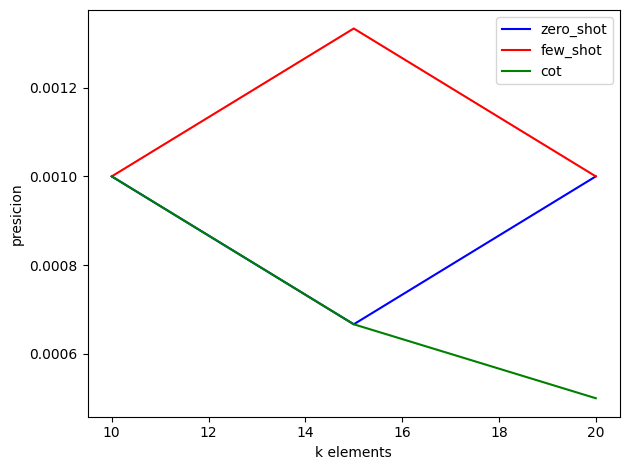

In [27]:
plt.figure()
plt.plot([10, 15, 20], np.array(zero_shot)[:, 0],'b', label="zero_shot")
plt.plot([10, 15, 20], np.array(few_shot)[:, 0],'r', label="few_shot")
plt.plot([10, 15, 20], np.array(cot_shot)[:, 0],'g', label="cot")
plt.legend()
plt.xlabel('k elements')
plt.ylabel('presicion')
plt.tight_layout()
plt.show()

## NDCG

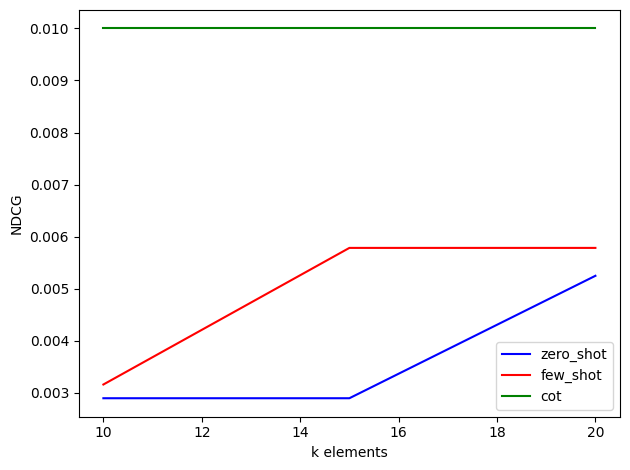

In [28]:
plt.figure()
plt.plot([10, 15, 20], np.array(zero_shot)[:, 1],'b', label="zero_shot")
plt.plot([10, 15, 20], np.array(few_shot)[:, 1],'r', label="few_shot")
plt.plot([10, 15, 20], np.array(cot_shot)[:, 1],'g', label="cot")
plt.legend()
plt.xlabel('k elements')
plt.ylabel('NDCG')
plt.tight_layout()
plt.show()

## recall

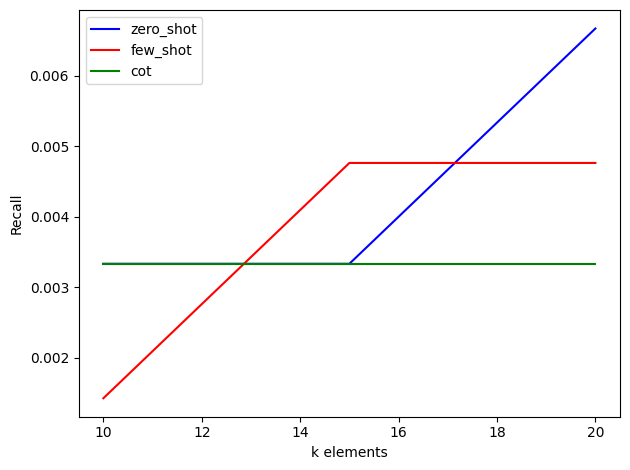

In [29]:
plt.figure()
plt.plot([10, 15, 20], np.array(zero_shot)[:, 2],'b', label="zero_shot")
plt.plot([10, 15, 20], np.array(few_shot)[:, 2],'r', label="few_shot")
plt.plot([10, 15, 20], np.array(cot_shot)[:, 2],'g', label="cot")
plt.legend()
plt.xlabel('k elements')
plt.ylabel('Recall')
plt.tight_layout()
plt.show()

## Novelty

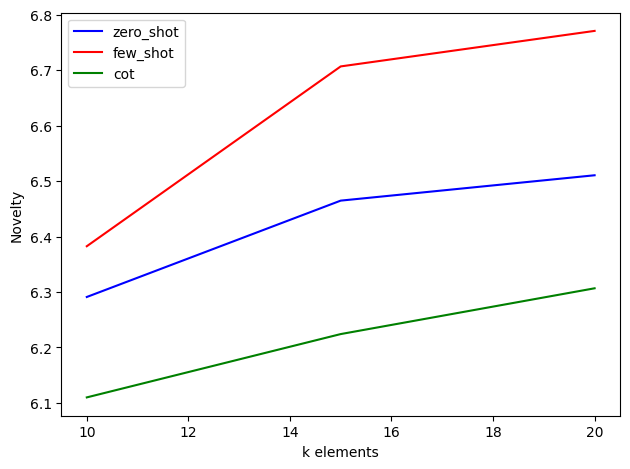

In [31]:
plt.figure()
plt.plot([10, 15, 20], np.array(zero_shot)[:, 3],'b', label="zero_shot")
plt.plot([10, 15, 20], np.array(few_shot)[:, 3],'r', label="few_shot")
plt.plot([10, 15, 20], np.array(cot_shot)[:, 3],'g', label="cot")
plt.legend()
plt.xlabel('k elements')
plt.ylabel('Novelty')
plt.tight_layout()
plt.show()

## Diversity

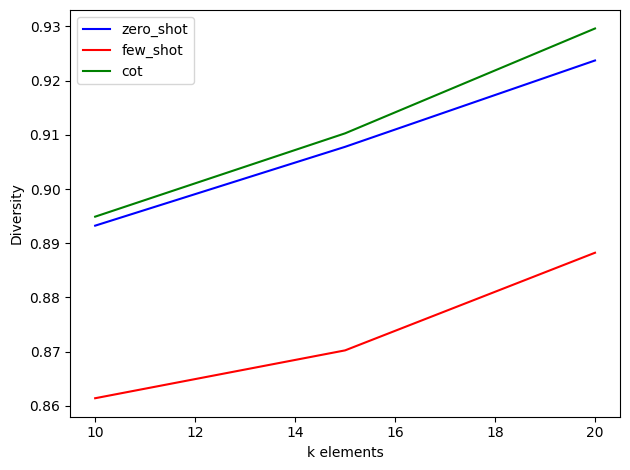

In [32]:
plt.figure()
plt.plot([10, 15, 20], np.array(zero_shot)[:, 4],'b', label="zero_shot")
plt.plot([10, 15, 20], np.array(few_shot)[:, 4],'r', label="few_shot")
plt.plot([10, 15, 20], np.array(cot_shot)[:, 4],'g', label="cot")
plt.legend()
plt.xlabel('k elements')
plt.ylabel('Diversity')
plt.tight_layout()
plt.show()